In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType, DecimalType
from pyspark.sql.functions import col,when,sum,avg,row_number
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
%fs ls dbfs:/FileStore/tables/rootkey.csv

path,name,size,modificationTime
dbfs:/FileStore/tables/rootkey.csv,rootkey.csv,99,1736297978000


In [0]:
aws_keys_df =  spark.read.format('csv').option('header','true').option('inferschema','true').load('dbfs:/FileStore/tables/rootkey.csv')

aws_keys_df.columns

Out[4]: ['Access key ID', 'Secret access key']

In [0]:
ACCESS_KEY=aws_keys_df.select('Access key ID').take(1)[0]['Access key ID']
SECRET_KEY=aws_keys_df.select('Secret access key').take(1)[0]['Secret access key']


In [0]:
import urllib
ENCODED_SECRET_KEY = urllib.parse.quote(string=SECRET_KEY,safe="")


In [0]:
AWS_S3_BUCKET = 'my-data-analytics-prj'
MOUNT_NAME = '/mnt/mount_s3'
SOURCE_URL = f"s3a://{AWS_S3_BUCKET}"

In [0]:
dbutils.fs.mount(
    source=SOURCE_URL,
    mount_point=MOUNT_NAME,
    extra_configs={
        "fs.s3a.access.key": ACCESS_KEY,
        "fs.s3a.secret.key": SECRET_KEY
    }
)

---------------------------------------------------------------------------
ExecutionError                            Traceback (most recent call last)
File <command-4213482093363824>:1
----> 1 dbutils.fs.mount(
      2     source=SOURCE_URL,
      3     mount_point=MOUNT_NAME,
      4     extra_configs={
      5         "fs.s3a.access.key": ACCESS_KEY,
      6         "fs.s3a.secret.key": SECRET_KEY
      7     }
      8 )

File /databricks/python_shell/dbruntime/dbutils.py:364, in DBUtils.FSHandler.prettify_exception_message.<locals>.f_with_exception_handling(*args, **kwargs)
    362 exc.__context__ = None
    363 exc.__cause__ = None
--> 364 raise exc

ExecutionError: An error occurred while calling o2003.mount.
: java.rmi.RemoteException: java.lang.IllegalArgumentException: requirement failed: Directory already mounted: /mnt/mount_s3; nested exception is: 
	java.lang.IllegalArgumentException: requirement failed: Directory already mounted: /mnt/mount_s3
	at com.databricks.backend.da

In [0]:
%fs ls 'mnt/mount_s3'

path,name,size,modificationTime
dbfs:/mnt/mount_s3/Ball_By_Ball.csv,Ball_By_Ball.csv,25099132,1736308179000
dbfs:/mnt/mount_s3/Match.csv,Match.csv,113358,1736308181000
dbfs:/mnt/mount_s3/Player.csv,Player.csv,34614,1736308179000
dbfs:/mnt/mount_s3/Player_match.csv,Player_match.csv,2664692,1736308180000
dbfs:/mnt/mount_s3/Team.csv,Team.csv,343,1736308179000


In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("IPL DATA ANALYSIS").getOrCreate()


In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

In [0]:
match_schema= StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(10, 2), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

In [0]:
ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").load("/mnt/mount_s3/Ball_By_Ball.csv")
match_df = spark.read.schema(match_schema).format("csv").option("header","true").load("/mnt/mount_s3/Match.csv")
player_df = spark.read.schema(player_schema).format("csv").option("header","true").load("/mnt/mount_s3/Player.csv")
player_match_df = spark.read.schema(player_match_schema).format("csv").option("header","true").load("/mnt/mount_s3/Player_match.csv")
team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("/mnt/mount_s3/Team.csv")

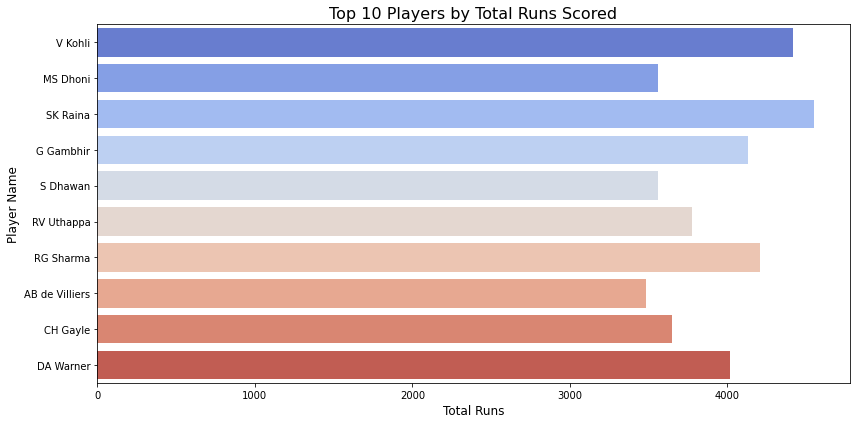

In [0]:
most_runs_df = (
    ball_by_ball_df.groupBy("striker").agg(sum("runs_scored").alias("total_runs")).orderBy(col("total_runs").desc()).limit(10)
)

top_players_df = most_runs_df.join(player_df, most_runs_df.striker == player_df.player_id, "inner")

top_players_pandas = top_players_df.select("player_name", "total_runs").toPandas()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_players_pandas,
    x="total_runs",
    y="player_name",
    palette="coolwarm"
)
plt.title("Top 10 Players by Total Runs Scored", fontsize=16)
plt.xlabel("Total Runs", fontsize=12)
plt.ylabel("Player Name", fontsize=12)
plt.tight_layout()
plt.show()


In [0]:
# Step 1: Group and aggregate the data in Spark
highest_runs_in_match_df = (
    ball_by_ball_df
    .groupBy("match_id", "striker")
    .agg(sum("runs_scored").alias("total_runs"))
    .orderBy(col("total_runs").desc())
    .limit(10).distinct()
)

highest_runs_with_name_df = highest_runs_in_match_df.join(
    player_df,
    highest_runs_in_match_df.striker == player_df.player_id,
    "inner"
).select(
    player_df.player_name,
    highest_runs_in_match_df.total_runs
)


highest_runs_with_name_df.show()



+--------------+----------+
|   player_name|total_runs|
+--------------+----------+
|   BB McCullum|       158|
|      V Sehwag|       119|
|      V Sehwag|       122|
|AB de Villiers|       129|
|AB de Villiers|       133|
|      CH Gayle|       128|
|      CH Gayle|       175|
|   PC Valthaty|       120|
|       M Vijay|       127|
|     DA Warner|       126|
+--------------+----------+



In [0]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")